In [1]:
#Read in digits
d1=scan("Zl1d.dat",nlines=1000,n=256000)
d1=matrix(d1,256,1000)

In [2]:
#Create Stroke function
stroke = function(x1,y1,theta,len,width)
{
    x=c(1:16)
    y=c(1:16)

    x=x-x1
    y=y-y1
    u1=x*cos(theta)
    u2=y*sin(theta)
    #u=ones %*% t(u1) + t(ones %*% t(u2))
    u=matrix(u1,16,16)+t(matrix(u2,16,16))

    v1=-x*sin(theta)
    v2=y*cos(theta)
    #v=(ones %*% t(v1) + t(ones %*% t(v2)))
    v=matrix(v1,16,16)+t(matrix(v2,16,16))

    m = (v > 0 & v < len)
    exp(-u*u/width)*m
}

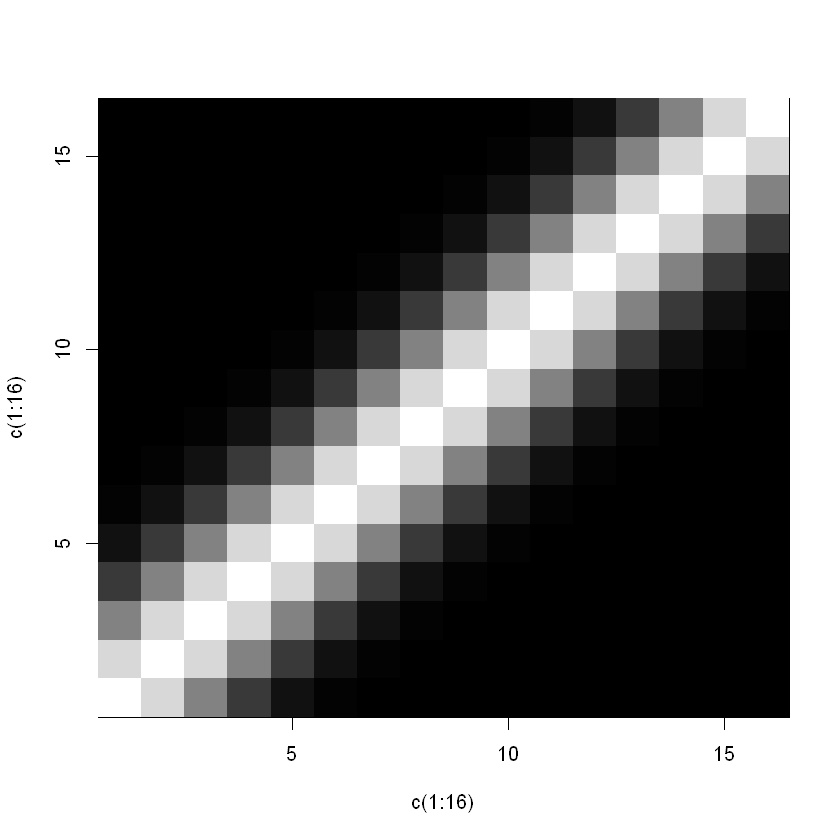

In [3]:
# draw one stroke
s = stroke(16.5,16.5,pi*0.75,22,3)
image(c(1:16),c(1:16),256*s,col=gray(c(0:256)/256))

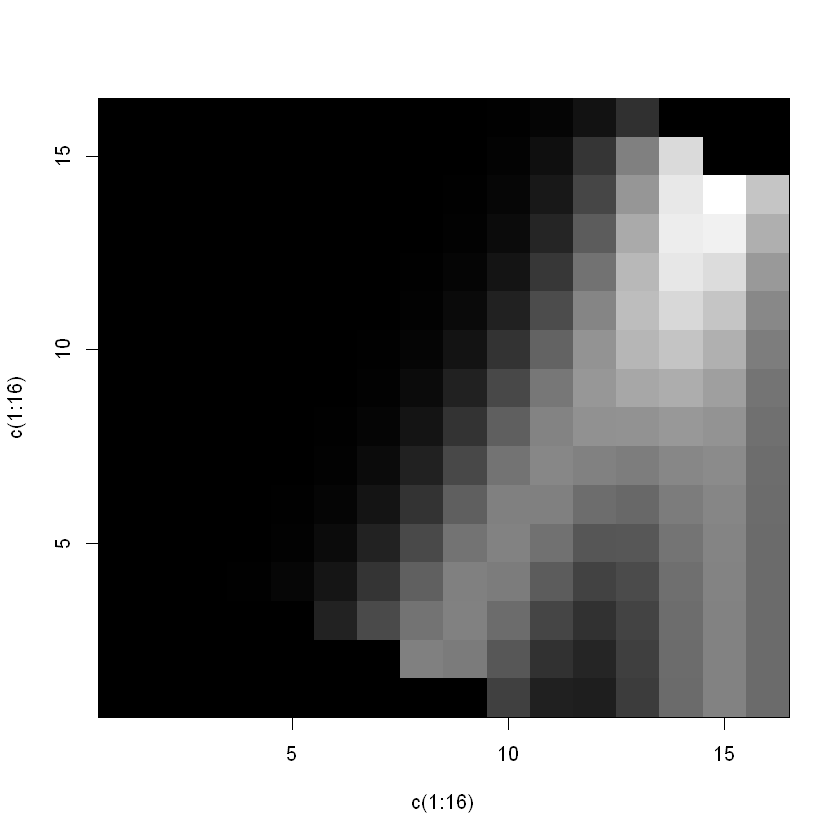

In [4]:
# draw 2 strokes
s1 = stroke(15,15,pi*0.85,15,5)
s2 = stroke(15,15,pi*1,15,5)
im=s1+s2
image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))

In [5]:
#select particular image
z = matrix(d1[,2],16,16)

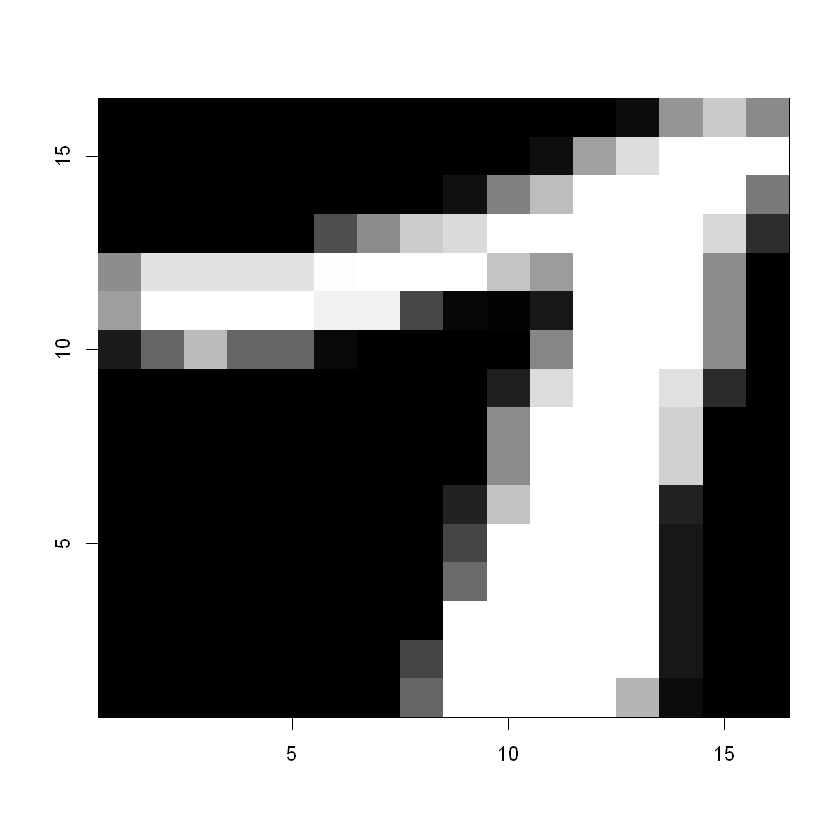

In [6]:
#Get image of z
image(c(1:16),c(1:16),z[,16:1],col=gray(c(0:256)/256),xlab="",ylab="",mar=c(1,1,1,1))

In [7]:
#Draw strokes
s1=stroke(14,14,0.55*pi,15,2)
s2=stroke(13,13,1.0*pi,15,3)
im=s1+s2
im[im > 1] = 1

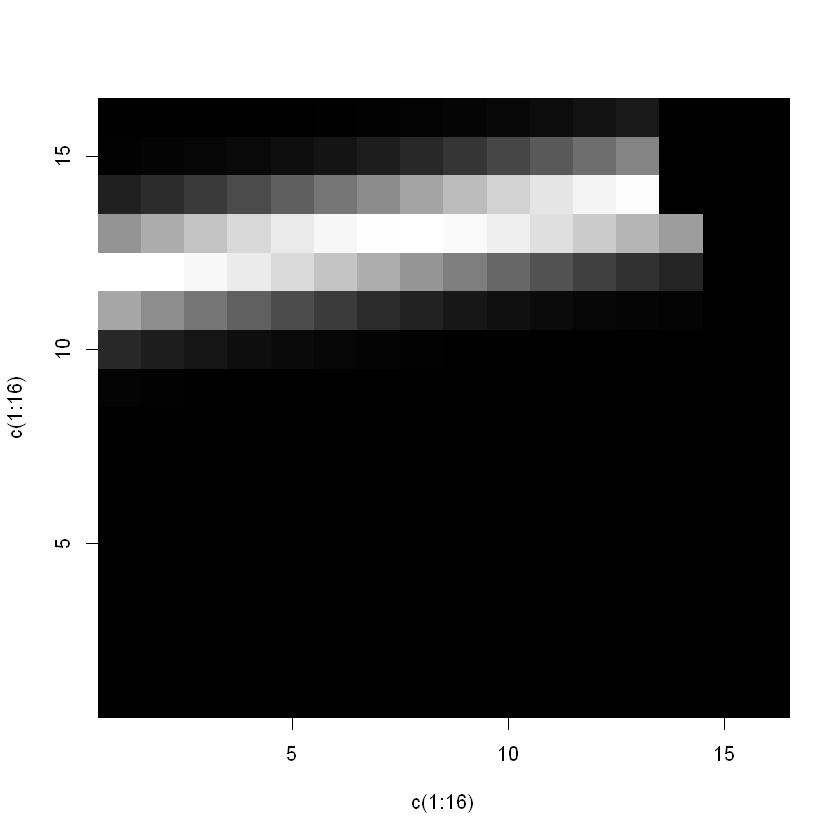

In [8]:
# show image of 1 stroke
image(c(1:16),c(1:16),256*s1,col=gray(c(0:256)/256))

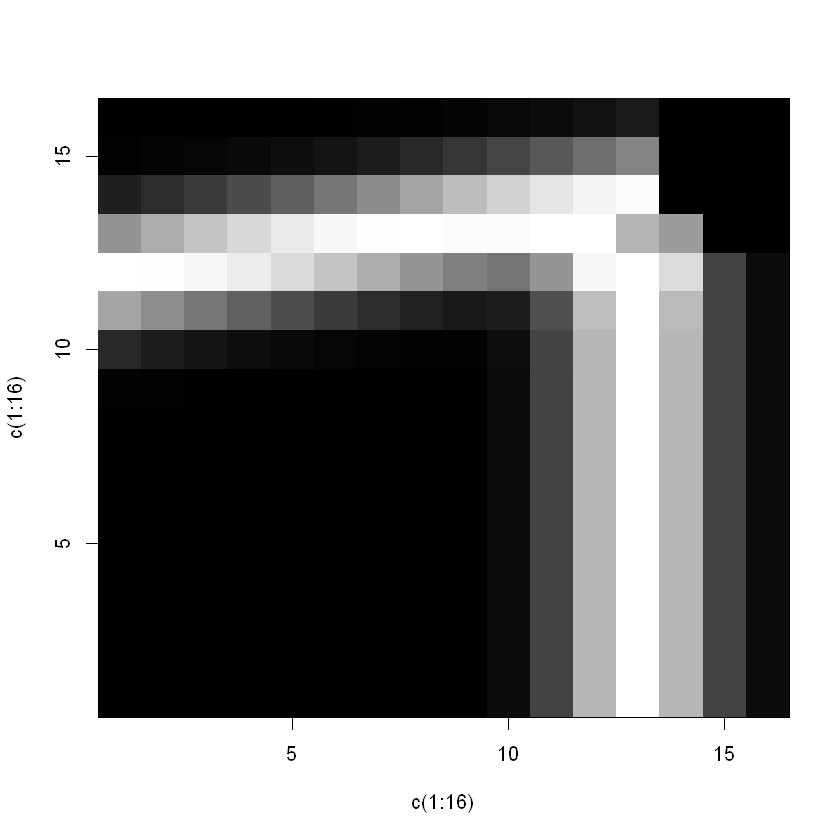

In [9]:
# show image of 2 strokes
image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))

In [10]:
#Define distance function
dist = function(a,b)
{
    sum((a-b)^2)
}

In [11]:
imfit = function(z)
{
    theta1=0
    theta2=0
    x1=0
    y1=0
    x2=0
    y2=0
    chi=0
    len1=0
    width1=0
    len2=0
    width2=0

    theta1[1] = 0.55*pi 
    theta2[1] = 0.8*pi
    x1[1] = 15 
    y1[1] = 15 
    x2[1] = 15 
    y2[1] = 15 
    len1[1] = 15
    width1[1] = 2.0
    len2[1] = 15 
    width2[1] = 2.0

    imin=1
    chimin=10000000

    for(i in c(1:10000))
    {
        theta1[i] = theta1[imin] + 0.5*(runif(1)-0.5)
        theta2[i] = theta2[imin] + 0.5*(runif(1)-0.5)
        x1[i] = x1[imin] + 5.0*(runif(1)-0.5)
        y1[i] = y1[imin] + 5.0*(runif(1)-0.5)
        x2[i] = x2[imin] + 5.0*(runif(1)-0.5)
        y2[i] = y2[imin] + 5.0*(runif(1)-0.5)
        len1[i] = len1[imin] + 5*(runif(1)-0.5)
        width1[i] = max(width1[imin] + 7.0*(runif(1)-0.5),0)
        len2[i] = len2[imin] + 5*(runif(1)-0.5)
        width2[i] = max(width2[imin] + 7.0*(runif(1)-0.5),0)

        s1=stroke(x1[i],y1[i],theta1[i],len1[i],width1[i])
        s2=stroke(x2[i],y2[i],theta2[i],len2[i],width2[i])
        im=s1+s2
        im[im > 1] = 1
        chi[i] = dist(256*im,z[,16:1])

        if(chi[i] < chimin)
        {
            chimin = chi[i]
            imin =i
        }
    }#end of for loop

    c(x1[imin],y1[imin],theta1[imin],len1[imin],width1[imin],x2[imin],y2[imin],theta2[imin],len2[imin],width2[imin])
}

In [12]:
imfit2 = function(z)
{
    theta1=0
    theta2=0
    x1=0
    y1=0
    x2=0
    y2=0
    chi=0
    len1=0
    width1=0
    len2=0
    width2=0

    theta1[1] = 0.55*pi 
    theta2[1] = 0.8*pi
    x1[1] = 15 
    y1[1] = 15 
    x2[1] = 15 
    y2[1] = 15 
    len1[1] = 15
    width1[1] = 2.0
    len2[1] = 15 
    width2[1] = 2.0

    imin=1
    chimin=10000000

    for(i in c(1:10000))
    {
        theta1[i] = min(max(theta1[imin] + 0.5*(runif(1)-0.5), 0.55 * pi), pi* 0.8)
        theta2[i] = min(max(theta2[imin] + 0.5*(runif(1)-0.5),theta1[i]+0.17*pi, 0.8*pi),pi*1.06)
        x1[i] = max(min(17,x1[imin] + 5.0*(runif(1)-0.5)),10)
        y1[i] = max(min(17,y1[imin] + 5.0*(runif(1)-0.5)),10)
        x2[i] = max(min(17,x2[imin] + 5.0*(runif(1)-0.5)),10, x1[i])
        y2[i] = max(min(17,y2[imin] + 5.0*(runif(1)-0.5)),10, y1[i])
        len1[i] = min(max(10.0,len1[imin] + 5*(runif(1)-0.5)),22.0)
        width1[i] = min(max(width1[imin] + 7.0*(runif(1)-0.5),0.5),5.0)
        len2[i] = min(max(10.0,len2[imin] + 5*(runif(1)-0.5)), 18.0)
        width2[i] = min(max(width2[imin] + 7.0*(runif(1)-0.5),0.5),7.0)

        s1=stroke(x1[i],y1[i],theta1[i],len1[i],width1[i])
        s2=stroke(x2[i],y2[i],theta2[i],len2[i],width2[i])

        im=s1+s2
        im[im > 1] = 1
        chi[i] = dist(256*im,z[,16:1])

        t = 10000/(1 + (0.85*i))

        if (chi[i] - chimin < 0)
        {
                chimin = chi[i]
            imin = i
        }

        else
        {
            if(exp(-(chi[i]-chimin)/t) > runif(1))
            {
                chimin = chi[i]
                imin = i
            }
        }

    }#end of for loop

    c(x1[imin],y1[imin],theta1[imin],len1[imin],width1[imin],x2[imin],y2[imin],theta2[imin],len2[imin],width2[imin],chimin)
}

# COMPARE SPECIFIC IMAGE

png 
  2

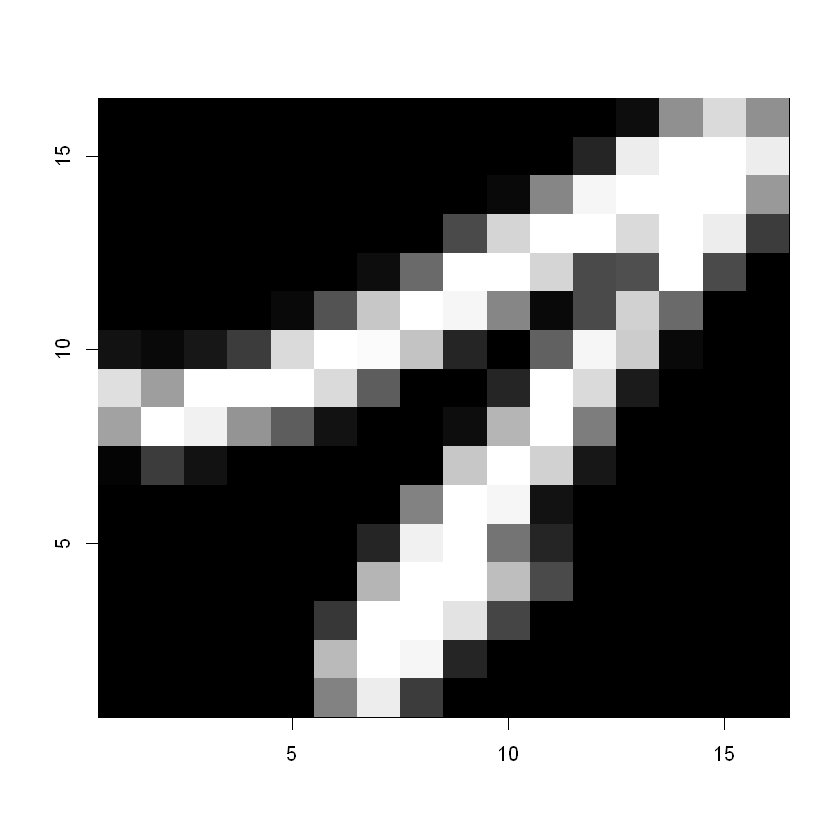

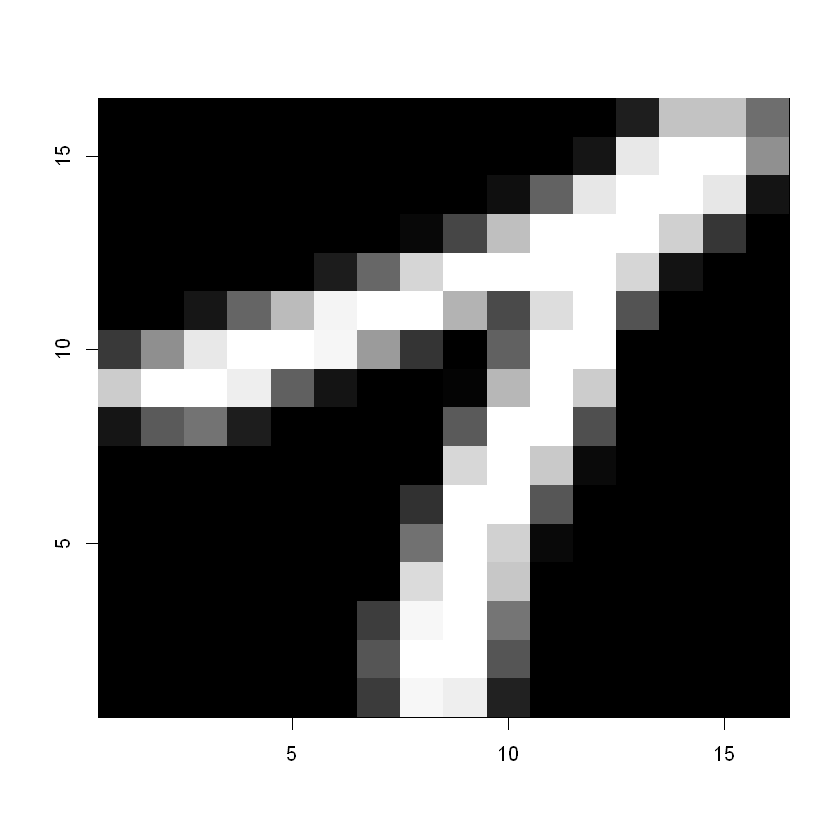

In [ ]:
# iterate through the images
dev.set(3)
par(mfrow = c(1,1))
for(i in c(500:1000))
{
    z = matrix(d1[,i],16,16)
    image(c(1:16),c(1:16),z[,16:1],col=gray(c(0:256)/256),xlab="",ylab="",mar=c(1,1,1,1))
    readline()
}

In [13]:
# set up to show 2 images
dev.set(2)
par(mfrow=c(1,2))

png 
  2

In [13]:
# select image
j = 5
z = matrix(d1[,j],16,16)

In [14]:
# get the results of the old fitting function
#res1 = imfit(z)
#res1

In [15]:
# get the results of the new fitting function
res2 = imfit2(z)
res2

[1] 1.603707e+01 1.658460e+01 2.263089e+00 2.200000e+01 8.838375e-01
 [6] 1.603707e+01 1.700000e+01 2.803998e+00 1.772805e+01 1.614875e+00
[11] 3.810856e+05

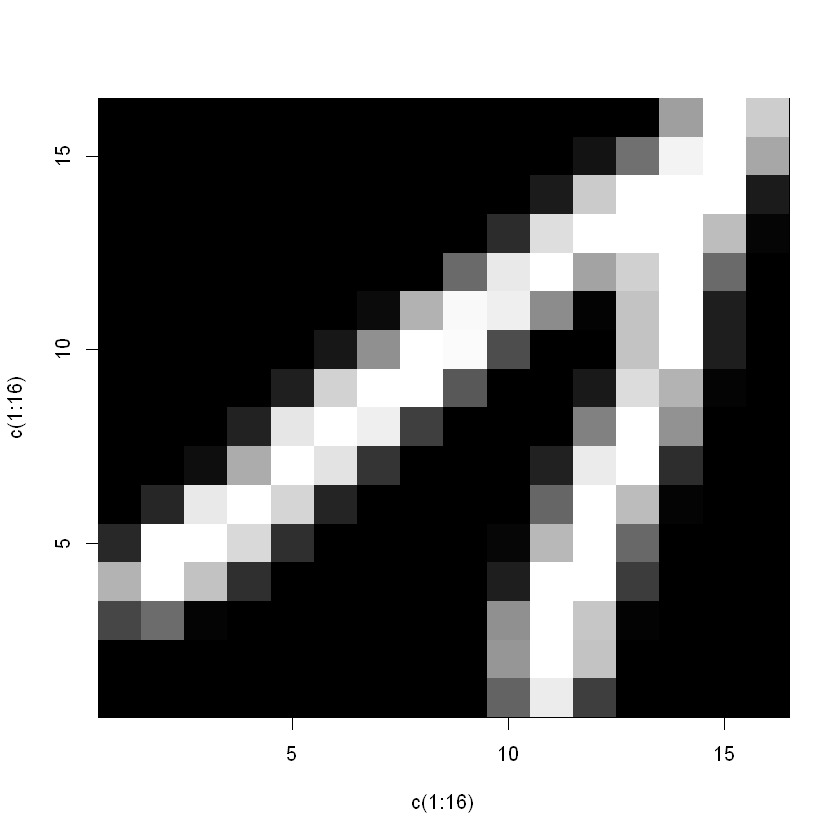

In [16]:
# output the original image
image(c(1:16),c(1:16),z[,16:1],col=gray(c(0:256)/256))

In [17]:
# create the new fitted image
s1=stroke(res2[1],res2[2],res2[3],res2[4],res2[5])
s2=stroke(res2[6],res2[7],res2[8],res2[9],res2[10])
im = s1+s2
im[im > 1] = 1

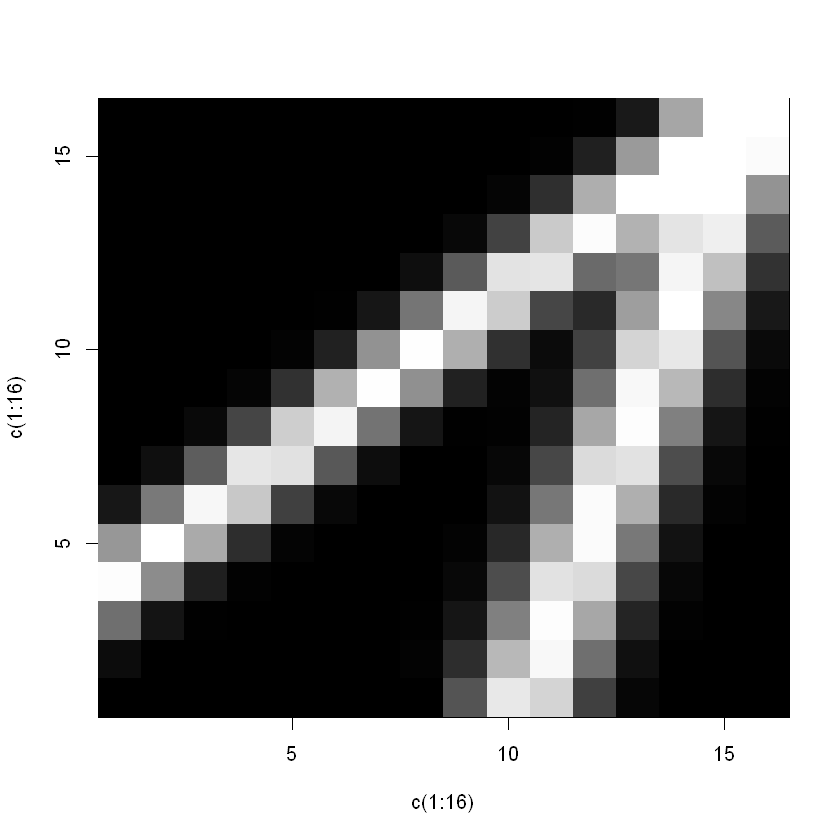

In [18]:
# output the fitted image
image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))

png 
  2

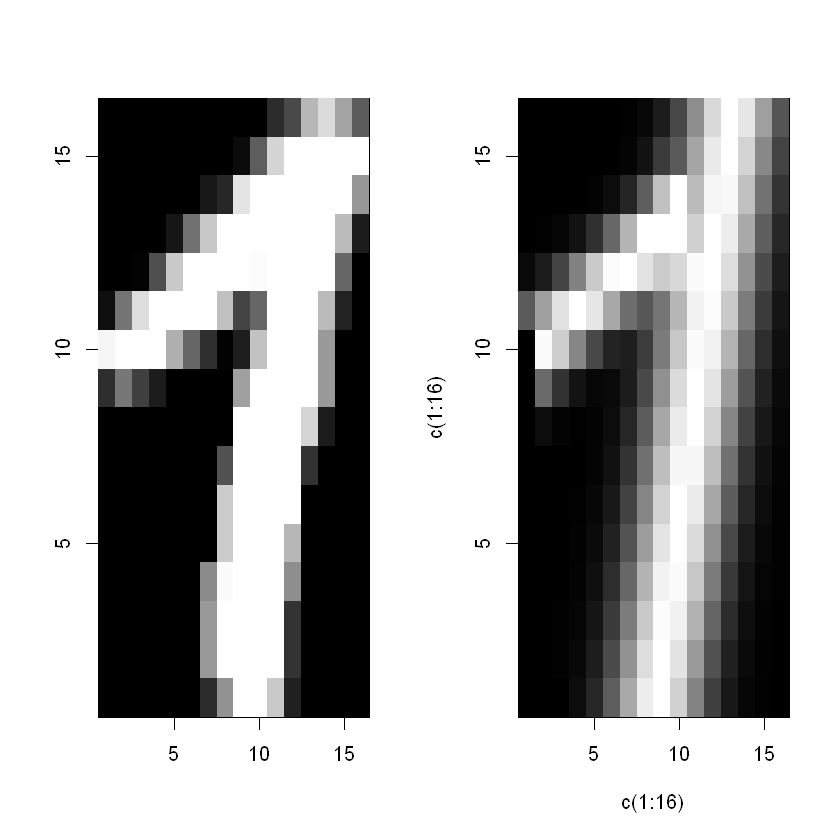

In [ ]:
# iterate through side by side images
dev.set(2)
par(mfrow=c(1,2))
for(i in c(1:1000))
{
    z = matrix(d1[,i],16,16)
    image(c(1:16),c(1:16),z[,16:1],col=gray(c(0:256)/256),xlab="",ylab="",mar=c(1,1,1,1))
    res2 = imfit2(z)
    s1=stroke(res2[1],res2[2],res2[3],res2[4],res2[5])
    s2=stroke(res2[6],res2[7],res2[8],res2[9],res2[10])
    im = s1+s2
    im[im > 1] = 1
    image(c(1:16),c(1:16),256*im,col=gray(c(0:256)/256))
    readline()
}

In [19]:
------------------------------------------------------------------
# set up dual core

library(foreach)
library(iterators)
library(doParallel)

numcores=detectCores()
registerDoParallel(numcores)

ERROR: Error in -library(foreach): invalid argument to unary operator


In [20]:
# iterate through digits
list = foreach (i=1:100) %dopar%
{
    z=matrix(d1[,i],16,16)
    res=imfit2(z)
    chimin = res[11]

    return (chimin)
}

Warning message:
"executing %dopar% sequentially: no parallel backend registered"

In [21]:
# show list of chimins
list

[[1]]
[1] 471820.4

[[2]]
[1] 521310.1

[[3]]
[1] 545733.9

[[4]]
[1] 708934.7

[[5]]
[1] 465975

[[6]]
[1] 658557.6

[[7]]
[1] 678060.8

[[8]]
[1] 970794.9

[[9]]
[1] 546873.5

[[10]]
[1] 414840.1

[[11]]
[1] 379542.4

[[12]]
[1] 439656.6

[[13]]
[1] 640218.9

[[14]]
[1] 578994.6

[[15]]
[1] 684081.8

[[16]]
[1] 698086.5

[[17]]
[1] 648954.9

[[18]]
[1] 418993.6

[[19]]
[1] 452795.3

[[20]]
[1] 476495.6

[[21]]
[1] 611628.1

[[22]]
[1] 598933.2

[[23]]
[1] 722804.9

[[24]]
[1] 697212.3

[[25]]
[1] 566095.9

[[26]]
[1] 487530.2

[[27]]
[1] 571816

[[28]]
[1] 551543.6

[[29]]
[1] 337951.4

[[30]]
[1] 790350.3

[[31]]
[1] 472217.6

[[32]]
[1] 591170.7

[[33]]
[1] 335167.6

[[34]]
[1] 2401855

[[35]]
[1] 558065.2

[[36]]
[1] 505759.1

[[37]]
[1] 425900.5

[[38]]
[1] 420245.3

[[39]]
[1] 568549.3

[[40]]
[1] 466410.7

[[41]]
[1] 386454.8

[[42]]
[1] 656461.1

[[43]]
[1] 697396.1

[[44]]
[1] 763655.8

[[45]]
[1] 658980.5

[[46]]
[1] 721686.5

[[47]]
[1] 627302.1

[[48]]
[1] 600655.1

[[49]]
[1] 283805.5

[[50]]
[1] 740128.5

[[51]]
[1] 444887.1

[[52]]
[1] 520219.5

[[53]]
[1] 835591.4

[[54]]
[1] 325536

[[55]]
[1] 610615.2

[[56]]
[1] 501961.9

[[57]]
[1] 601525

[[58]]
[1] 497220.1

[[59]]
[1] 792985.7

[[60]]
[1] 480692.5

[[61]]
[1] 702171.8

[[62]]
[1] 657423.9

[[63]]
[1] 370891.5

[[64]]
[1] 540688.9

[[65]]
[1] 411883.7

[[66]]
[1] 534714

[[67]]
[1] 726901.2

[[68]]
[1] 625715.9

[[69]]
[1] 559792.1

[[70]]
[1] 460647.3

[[71]]
[1] 689786.5

[[72]]
[1] 586208

[[73]]
[1] 335333.8

[[74]]
[1] 1896419

[[75]]
[1] 423017.6

[[76]]
[1] 613213.3

[[77]]
[1] 582760.9

[[78]]
[1] 447029.3

[[79]]
[1] 284691.4

[[80]]
[1] 444831.1

[[81]]
[1] 328570.6

[[82]]
[1] 406710.5

[[83]]
[1] 327490.3

[[84]]
[1] 337347.6

[[85]]
[1] 769697.4

[[86]]
[1] 638503.8

[[87]]
[1] 526554

[[88]]
[1] 520452.8

[[89]]
[1] 594637.5

[[90]]
[1] 487219.9

[[91]]
[1] 549698

[[92]]
[1] 772920.1

[[93]]
[1] 497210.8

[[94]]
[1] 652543.5

[[95]]
[1] 585017.5

[[96]]
[1] 539329.9

[[97]]
[1] 321722

[[98]]
[1] 588961.3

[[99]]
[1] 219298.9

[[100]]
[1] 709195.9

In [22]:
# count the number of digits that are well modeled
num = length(which(list[1:100] < 600000))
num

[1] 63